
## House Prices - Advanced Regression Techniques
Guneet Kohli

**Project Title: Predicting House Prices in Ames, Iowa**

**1. Introduction**
   - Brief overview of the project and its objectives.
   - Introduction to the Ames Housing dataset.
   - Explanation of the evaluation metric (Root-Mean-Squared-Error).

**2. Data Understanding and Exploration**
   - Load the dataset and examine its structure.
   - Explore the features and their distributions.
   - Analyze missing values and potential outliers.
   - Visualize relationships between features and the target variable (SalePrice).

**3. Data Preprocessing**
   - Handle missing values (imputation, deletion, or other methods).
   - Encode categorical variables (one-hot encoding, label encoding).
   - Transform skewed features if necessary (log transformation).
   - Scale numerical features if required (standardization or normalization).

**4. Feature Engineering**
   - Create new features based on domain knowledge or insights from the data.
   - Perform feature selection to reduce dimensionality if needed (e.g., using correlation analysis or feature importance from models).

**5. Model Selection and Training**
   - Choose appropriate regression algorithms for the task (e.g., Linear Regression, Random Forest, Gradient Boosting).
   - Split the dataset into training and validation sets.
   - Train baseline models with default parameters.
   - Evaluate models using cross-validation and the evaluation metric (RMSE).
   - Compare model performance and select the best-performing one(s) for further tuning.

**6. Hyperparameter Tuning**
   - Use techniques like grid search or random search to find optimal hyperparameters for selected models.
   - Fine-tune model parameters to improve performance.

**7. Model Evaluation**
   - Evaluate the tuned models on the validation set.
   - Analyze model performance using learning curves, residual plots, and other diagnostic tools.
   - Compare performance against baseline models.

**8. Ensemble Methods**
   - Implement ensemble techniques like stacking or blending to combine predictions from multiple models.
   - Evaluate ensemble models and compare with individual models.

**9. Interpretation and Insights**
   - Interpret model coefficients or feature importance scores to understand factors influencing house prices.
   - Discuss insights gained from the analysis.

**10. Conclusion and Future Work**
   - Summarize key findings and the effectiveness of the developed models.
   - Discuss potential areas for further improvement (e.g., feature engineering, model selection).
   - Conclude the project and suggest future directions.

**11. References**
   - Acknowledge sources of datasets, libraries, and tutorials used in the project.

This outline provides a structured approach to tackling the Ames Housing dataset, including data exploration, preprocessing, model building, and evaluation. Depending on the complexity of the dataset and your preferences, you may adjust or expand upon these sections accordingly.

# Information about Data:
Data includes 2930 observations and 82 predictor variables (house attributes) and one target variable (price).
Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA. 
The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables. 

# Introduction:

This project focuses on predicting the sale prices of residential homes in Ames, Iowa, using machine learning techniques. We'll be working with the Ames Housing dataset, which contains detailed information on various aspects of the homes. Our goal is to develop models that accurately estimate the sale prices based on these features. We'll evaluate our models using the Root-Mean-Squared-Error (RMSE), a metric that measures the average deviation between predicted and actual sale prices.

## Loading packages and libraries

In [1]:
install.packages("tidyverse")
install.packages("xgboost")
install.packages("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(corrplot)

corrplot 0.92 loaded



In [4]:
library(tidyverse)
library(xgboost)
library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [5]:
library(dplyr)
library(ggplot2)

# Data Examination:

1. **Loading Dataset:** We begin by loading the Ames Housing dataset into our environment and examining its structure to understand the available features and their data types.

2.  **Handling Missing Values and Outliers:** We analyze the dataset for missing values and potential outliers, devising strategies to address them effectively while preserving data integrity.

3. **Feature Exploration:** Next, we explore the features within the dataset, gaining insights into their distributions and identifying potential patterns or trends.

4. **Visualizing Relationships:** Utilizing visualizations, we investigate relationships between the features and the target variable (SalePrice), aiming to discern any discernible patterns or correlations that can aid in predictive modeling.


## Loading Data

In [7]:
train_data <- read_csv("/content/train.csv", show_col_types = FALSE)
test_data <- read_csv("/content/test.csv", show_col_types = FALSE)

In [8]:
all_data <- bind_rows(train_data, test_data, .id = "set")

# Data Preprocessing

* Checking for character and numericle data
* Handling null values


In [9]:
numeric_vars <- sapply(all_data, is.double)

In [10]:
char_vars <- sapply(all_data, is.character)

In [11]:
all_data[numeric_vars] <- lapply(all_data[numeric_vars], function(x) ifelse(is.na(x), median(x, na.rm = TRUE), x))

In [12]:
all_data[char_vars] <- lapply(all_data[char_vars], factor)

In [13]:
train_processed <- all_data %>% filter(set == "1") %>% select(-set)
test_processed <- all_data %>% filter(set == "2") %>% select(-set, -SalePrice)

## Exploratory Data Analysis (EDA):

* Histogram for SalePrice to understand its distribution.
* Correlation matrix to identify relationships between variables.

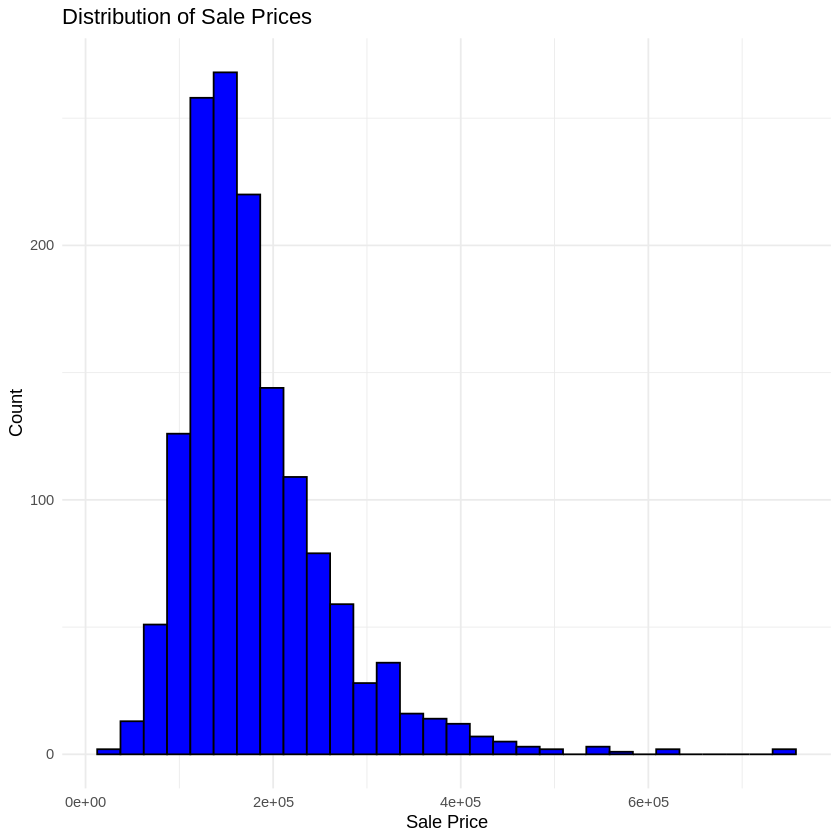

In [14]:
ggplot(train_processed, aes(x = SalePrice)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  theme_minimal() +
  labs(title = "Distribution of Sale Prices", x = "Sale Price", y = "Count")

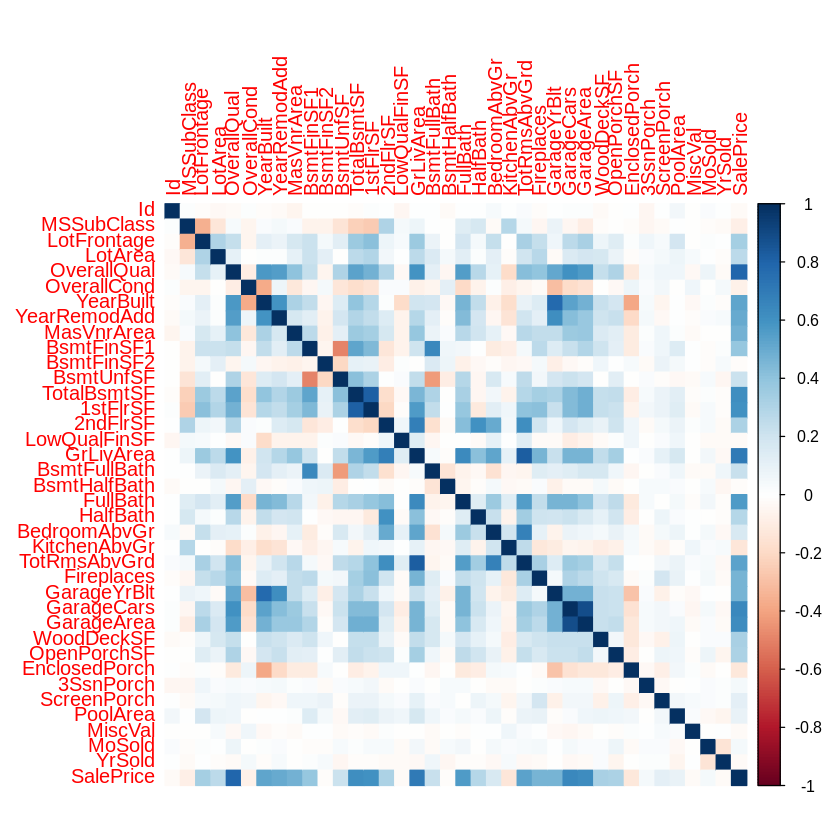

In [15]:
numerical_features <- train_processed %>% select(where(is.numeric))
corr_matrix <- cor(numerical_features, use = "complete.obs")
corrplot::corrplot(corr_matrix, method = "color")

# Feature Selection

* Features with a correlation greater than 0.5 with SalePrice are selected for the model.

In [16]:
high_corr_features <- names(which(abs(corr_matrix["SalePrice",]) > 0.5))
train_features <- train_processed[high_corr_features]

In [17]:
train_features <- train_features %>% select(-SalePrice)

## Data Splitting for Validation

* Training data is split into a training set (0.8) and a validation set to evaluate model performance.

## Model Training (XGBoost):

* XGBoost model is trained using the training data with specified parameters and an early stopping strategy
* Predictions are made on the validation set and RMSE is calculated to assess model performance

In [18]:
set.seed(123) # for reproducibility
training_index <- sample(1:nrow(train_features), 0.8 * nrow(train_features)) #create a random sample of indices
data_train <- train_features[training_index, ]
data_valid <- train_features[-training_index, ]
target_train <- train_processed$SalePrice[training_index]
target_valid <- train_processed$SalePrice[-training_index]

In [19]:
dtrain <- xgb.DMatrix(data = as.matrix(data_train), label = target_train)
dvalid <- xgb.DMatrix(data = as.matrix(data_valid), label = target_valid)

In [20]:
# Model parameters
params <- list(
  booster = "gbtree",
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 6,
  min_child_weight = 1,
  subsample = 0.8,
  colsample_bytree = 0.8
)

# Train the model
xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = 100,
  watchlist = list(train = dtrain, valid = dvalid),
  early_stopping_rounds = 10,
  print_every_n = 10
)

[1]	train-rmse:178814.503456	valid-rmse:179466.782790 
Multiple eval metrics are present. Will use valid_rmse for early stopping.
Will train until valid_rmse hasn't improved in 10 rounds.

[11]	train-rmse:69517.434661	valid-rmse:73932.238453 
[21]	train-rmse:31814.720251	valid-rmse:39979.572125 
[31]	train-rmse:19847.523001	valid-rmse:31412.194899 
[41]	train-rmse:16137.817573	valid-rmse:29713.113249 
[51]	train-rmse:14601.417631	valid-rmse:29464.026291 
Stopping. Best iteration:
[48]	train-rmse:14973.677480	valid-rmse:29433.523803



In [21]:
# Adjusted model parameters
params <- list(
  booster = "gbtree",
  objective = "reg:squarederror",
  eta = 0.01, # lower eta
  max_depth = 8, # increased depth
  min_child_weight = 1,
  subsample = 0.7, # slightly lower to prevent overfitting
  colsample_bytree = 0.7, # same as above
  lambda = 1, # L2 regularization
  alpha = 0.1 # L1 regularization
)

# Train the model with more rounds and a modified early stopping strategy
xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = 1000, # more rounds
  watchlist = list(train = dtrain, valid = dvalid),
  early_stopping_rounds = 50, # more patience
  print_every_n = 10
)


[1]	train-rmse:195627.346984	valid-rmse:196125.613596 
Multiple eval metrics are present. Will use valid_rmse for early stopping.
Will train until valid_rmse hasn't improved in 50 rounds.

[11]	train-rmse:178018.401377	valid-rmse:178840.507185 
[21]	train-rmse:162108.038562	valid-rmse:163192.591357 
[31]	train-rmse:147662.177840	valid-rmse:149069.358499 
[41]	train-rmse:134672.755860	valid-rmse:136404.249954 
[51]	train-rmse:122813.183937	valid-rmse:124871.985518 
[61]	train-rmse:112107.801389	valid-rmse:114577.868369 
[71]	train-rmse:102467.883281	valid-rmse:105273.338063 
[81]	train-rmse:93735.777555	valid-rmse:96865.648998 
[91]	train-rmse:85780.654398	valid-rmse:89266.889879 
[101]	train-rmse:78632.614382	valid-rmse:82410.971305 
[111]	train-rmse:72193.145732	valid-rmse:76292.455946 
[121]	train-rmse:66340.718564	valid-rmse:70800.436727 
[131]	train-rmse:61031.476115	valid-rmse:65863.229632 
[141]	train-rmse:56348.019719	valid-rmse:61614.392602 
[151]	train-rmse:52002.230633	valid-

In [22]:
valid_preds <- predict(xgb_model, newdata = dvalid)

# Calculating RMSE
rmse <- sqrt(mean((valid_preds - target_valid)^2))
print(paste("Validation RMSE:", rmse))

[1] "Validation RMSE: 29202.4870211629"


## Cross-Validation:

* Cross-validation is performed with XGBoost to further assess the model's robustness and optimize the number of boosting rounds.

100 nrounds and 10 nfold gave 0.48178 in Kaggle
500 nrounds and 10 nfold gave 0.15326 in Kaggle

In [23]:
# Cross-validation with XGBoost
cv_results <- xgb.cv(
  params = params,
  data = dtrain,
  nrounds = 500,
  nfold = 10,
  showsd = TRUE,
  stratified = FALSE,
  print_every_n = 10,
  early_stopping_rounds = 50,
  maximize = FALSE
)

best_nrounds <- cv_results$best_iteration
print(paste("Best number of rounds: ", best_nrounds))

[1]	train-rmse:195625.171742+1051.326913	test-rmse:195395.437608+9602.493083 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 50 rounds.

[11]	train-rmse:178072.959322+960.240679	test-rmse:177947.452217+9292.505618 
[21]	train-rmse:162163.817970+874.489157	test-rmse:162186.440682+8989.755254 
[31]	train-rmse:147769.706028+787.507963	test-rmse:147891.077031+8707.969522 
[41]	train-rmse:134725.071592+709.402105	test-rmse:135044.787775+8384.282053 
[51]	train-rmse:122928.903335+644.148523	test-rmse:123453.423608+8098.735032 
[61]	train-rmse:112266.629355+567.605286	test-rmse:113017.746764+7927.214084 
[71]	train-rmse:102629.413367+509.782324	test-rmse:103634.825614+7641.657667 
[81]	train-rmse:93896.109887+465.055754	test-rmse:95132.233703+7406.653320 
[91]	train-rmse:85996.716414+434.332872	test-rmse:87541.717135+7096.831329 
[101]	train-rmse:78850.800873+405.378064	test-rmse:80770.463687+6824.098347 
[111]	train-rms

In [24]:
# Preparing test set
test_features <- test_processed[high_corr_features %>% setdiff("SalePrice")]
dtest <- xgb.DMatrix(data = as.matrix(test_features))

# Final model training on the full dataset
final_model <- xgb.train(
  params = params,
  data = xgb.DMatrix(data = as.matrix(train_features), label = train_processed$SalePrice),
  nrounds = best_nrounds
)

# Making predictions
test_predictions <- predict(final_model, newdata = dtest)


submission <- data.frame(Id = test_processed$Id, SalePrice = test_predictions)
write.csv(submission, "submission_nround00_nfold10.csv", row.names = FALSE)

The experim describes using XGBoost with cross-validation to evaluate and optimize a model. The model was initially trained with 100 boosting rounds and 10 folds, resulting in a Kaggle score of 0.48178. After increasing the boosting rounds to 500 while keeping the folds the same, the score improved significantly to 0.15326. This indicates that a higher number of boosting rounds led to a better-performing model.

The improvement in Kaggle score when increasing nrounds from 100 to 500 suggests that allowing more boosting iterations before stopping helps the model to better capture the underlying patterns in the data.

